# Visualizations and Random Forest 

Prior to this task, you should have watched a video on random forest on Canvas.

## Advantages of Random Forest:

* Random forest can solve both type of problems that is classification and regression and does a decent estimation at both fronts.
* Random forest can be used on both categorical and continuous variables. 
* You do not have to scale features.
* Fairly robust to missing data and outliars.

## Disadvantages of Random Forest

* It is complex, e.g., look at the tree at the end of this exercise!  This makes it feel like a black box, and we have very little control over what the model does.
* It can take a long time to train.

In [2]:
# Here are some alternative ways to load packages in python as aliases 
# This can be useful if you call them often

import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that available here.

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT  % lower status of the population
* MEDV Median value of owner-occupied homes in 1000s of dollars

In [92]:
data = pd.read_csv('../data/HousingData.csv')
df = pd.DataFrame(data)
df.shape
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [93]:
df.shape

(506, 14)

We should check to see if there are any null values.  There are several ways we've learned to do this.

In [94]:
pd.isnull(df).any() 

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [95]:
pd.isnull(df).sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

So there are some null values in there.  You shoud decide how you want to deal with these.  In this exercise, I'm just going to remove any rows with null values.

Generally, remember, what we should look for are:
* There are not any data points that immediately appear as anomalous 
* No zeros in any of the measurement columns. 

Another method to verify the quality of the data is make basic plots. Often it is easier to spot anomalies in a graph than in numbers.

In [96]:
df_dropped = df.dropna()
pd.isnull(df_dropped).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [97]:
 df_dropped.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


It is useful to know whether some pairs of attributes are correlated and how much. For many ML algorithms correlated features that are not independent should be treated with caution.  Here is a good [blog](https://towardsdatascience.com/data-correlation-can-make-or-break-your-machine-learning-project-82ee11039cc9) on explaining why.

To prevent this, there are methods for deriving features that are as uncorrelated as possible (CA, ICA, autoencoder, dimensionality reduction, manifold learning, etc.), which we'll learn about in coming classes.

We can explore coreelation with Pandas pretty easily...

In [98]:
corr = df_dropped.corr(method='pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


### Let's explore/review some visualization approaches

A good way to look at correlations quickly is a visualization called a heatmap.  Let's take a look at correlations betewen features in our dataset.

<Axes: >

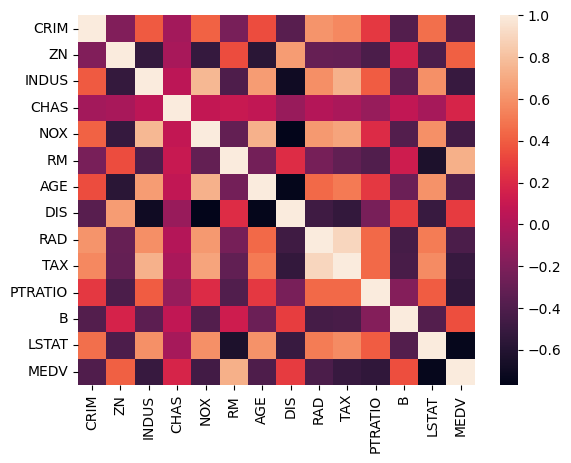

In [99]:
import seaborn as sns 

sns.heatmap(corr) # compute and plot the pair-wise correlations
# save to file, remove the big white borders
# You can read more about heatmaps and correlations in sns:  
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html



Let's take a look how we can explore the distributions of values within a specific feature.  Specifically, let's look at the distribution of property tax in Boston. We can do this either in matplotlib or sns.  There are so many tools available to you in Python!

In [140]:
df = df_dropped

(array([ 12.,   1.,   4.,  20.,   7.,  10.,   8.,  17.,  24.,  19.,  12.,
         54.,   2.,  11.,   3.,   8.,   3.,   1.,  10.,   8.,  31.,   2.,
          1.,  20.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 100.,   0.,   0.,   0.,   5.]),
 array([187.  , 197.48, 207.96, 218.44, 228.92, 239.4 , 249.88, 260.36,
        270.84, 281.32, 291.8 , 302.28, 312.76, 323.24, 333.72, 344.2 ,
        354.68, 365.16, 375.64, 386.12, 396.6 , 407.08, 417.56, 428.04,
        438.52, 449.  , 459.48, 469.96, 480.44, 490.92, 501.4 , 511.88,
        522.36, 532.84, 543.32, 553.8 , 564.28, 574.76, 585.24, 595.72,
        606.2 , 616.68, 627.16, 637.64, 648.12, 658.6 , 669.08, 679.56,
        690.04, 700.52, 711.  ]),
 <BarContainer object of 50 artists>)

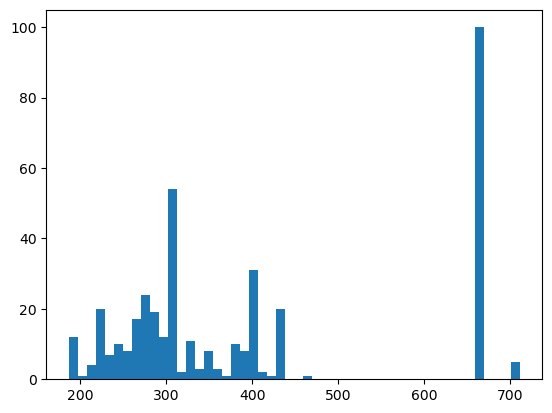

In [101]:
import matplotlib.pyplot as plt
attr = df['TAX']
plt.hist(attr, bins=50)

/var/folders/nn/j2bcm3r125b6680bp52bt3_w0000gn/T/ipykernel_65926/3391025905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr, bins=50)


<Axes: xlabel='TAX', ylabel='Density'>

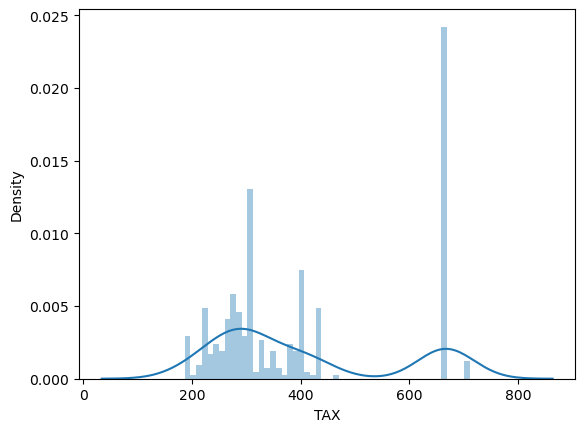

In [102]:
sns.distplot(attr, bins=50)

What's the correlation between property taxes and the number of rooms in a house?

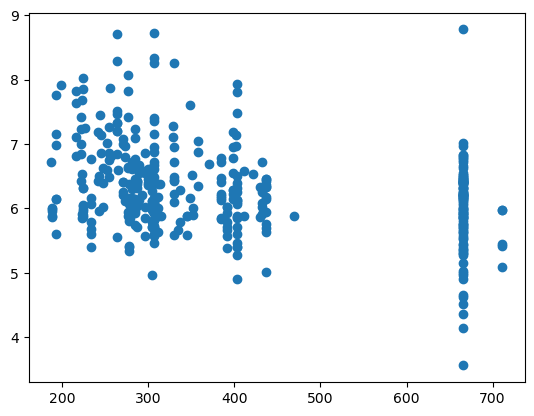

In [103]:
plt.scatter(df['TAX'], df['RM'])


Another possibility is to aggregate data points over 2D areas and estimate the [probability desnsity function](https://en.wikipedia.org/wiki/Probability_density_function). Its a 2D generalization of a histogram. We can either use a rectangular grid, or even a hexagonal one.

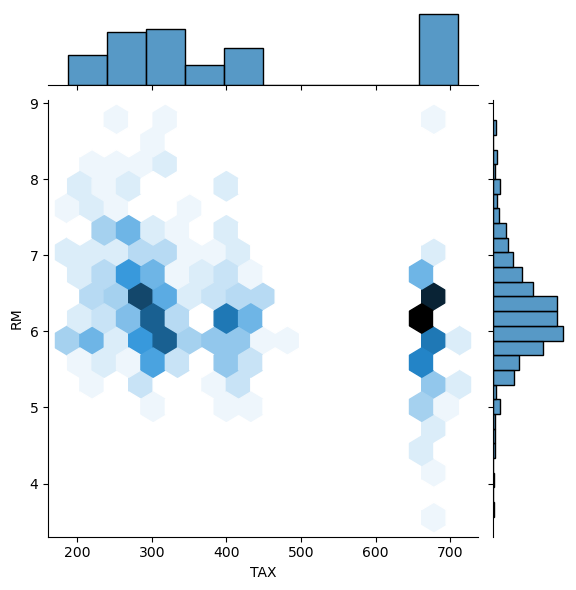

In [104]:
sns.jointplot(x = 'TAX', y = 'RM', data = df,  kind='hex')


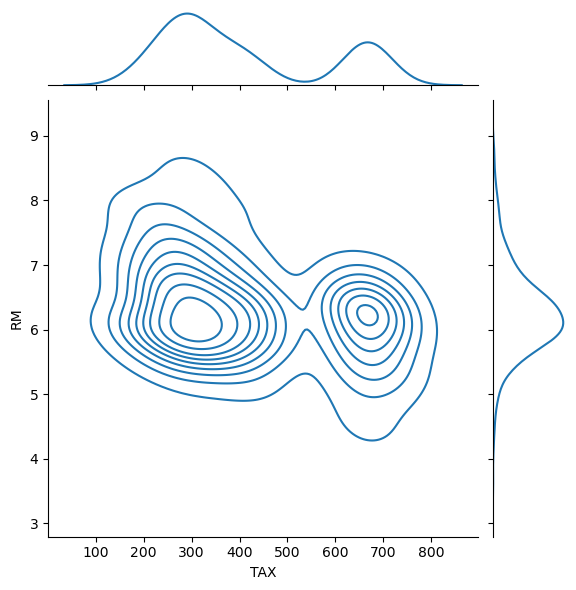

In [105]:
sns.jointplot(x = 'TAX', y = 'RM', data = df,  kind='kde')


What you'll see is you have access to so many visualizations.  A great way to explore them is through the gallery:  https://seaborn.pydata.org/examples/index.html


# How to implement Random Forest

First, we need to get a train and test dataset going...we are going to see if we can predict teh median value of housing

In [106]:
#  split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = df
df_target = pd.DataFrame(df, columns = ['MEDV']) #from the description
df_target #median value of owner occupied in $1000s
df_target.shape
y = df_target
y = np.array(y).ravel() # changes the 1-D array to a column vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [107]:

print(X_train.shape, y_train.shape)

(295, 14) (295,)


In [108]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [109]:
reg = ske.RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [110]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

The 'ravel' command flattens an array:  "ravel(): when you have y.shape == (10, 1), using y.ravel().shape == (10, ). In words... it flattens an array."

https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

In [111]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [151]:
y_pred = reg.predict(X_test)
print(y_pred)

[17.5044 25.0002 23.9029 49.7846 14.113  19.4981 28.5558 14.115  23.2614
 12.7603 33.103  19.7101 49.8712 21.9685 13.4122 29.0177 36.592  23.7847
 23.7805 24.3935 16.7145 36.832  20.7902 20.6206 12.4809 21.1417 19.0957
  5.5106 22.7285 20.742  27.3655 21.9965 18.5324 22.5732 15.16   17.1493
 22.2103 17.5041 20.2765 16.4677 21.6109 11.3557 24.9907 23.2071 31.9805
 15.2477 17.9306 19.9738 21.885  14.3645 24.3306 20.3717 12.8043 35.0014
  8.5283 10.4829 19.8071 20.4334 21.18   24.2649 18.2617 11.8199 22.2219
 27.0413 24.4901 44.4861 14.9888 29.5843 15.6475 34.9258 21.029  12.784
 21.9927 20.0911 19.4956 19.3536 19.971  23.2868  6.7144 32.0645 38.3736
 22.2494 11.7442 16.7244 19.3903 18.8352 31.5616 49.788  22.4621 20.7919
 22.5876 33.3879 21.3913 19.3697 13.0532 17.7683 21.4004 15.2529 20.3999]


How do we evaluate this model?  Previously, we've worked with labels for classifications but now instead of a DISCRETE target, we've got a continuous target.  For example, the confusion matrix doesn't make sense and the code will error out below:

In [152]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

ValueError: continuous is not supported

Check out this [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) and see if you can find some ways to evaluate this model.

In [153]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print(explained_variance_score(y_test, y_pred))
print(max_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred, multioutput='variance_weighted'))

0.9989598113978986
1.5138999999995733
0.11540404040403007
0.07560685797977709
0.9989438585382692


The importance of our features can be found in reg.feature_importances_. 

In [154]:
print(reg.feature_importances_)
print(df.columns)
df2 = pd.DataFrame({'feature_names':df.columns, 'fet_imp': reg.feature_importances_})
df2

[1.58834253e-04 2.89400787e-05 3.92825133e-05 1.56223764e-05
 7.45539993e-05 9.59643165e-04 1.07023220e-04 1.78254211e-04
 5.09864243e-05 7.79350041e-05 5.40204368e-05 1.15825994e-04
 1.10425065e-04 9.98028653e-01]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,feature_names,fet_imp
0,CRIM,0.000159
1,ZN,0.000029
2,INDUS,0.000039
3,CHAS,0.000016
4,NOX,0.000075
5,RM,0.000960
6,AGE,0.000107
7,DIS,0.000178
8,RAD,0.000051
9,TAX,0.000078


We can compute how much each feature contributes to decreasing the weighted impurity within a tree.   This is a fast calculation, but one should be cautious because it can be a biased approach.  It has a tendency to inflate the importance of continuous features or high-cardinality categorical variables (a lot of very uncommon or unique variables).

Text(0.5, 1.0, 'Feature Importance Bar Chart')

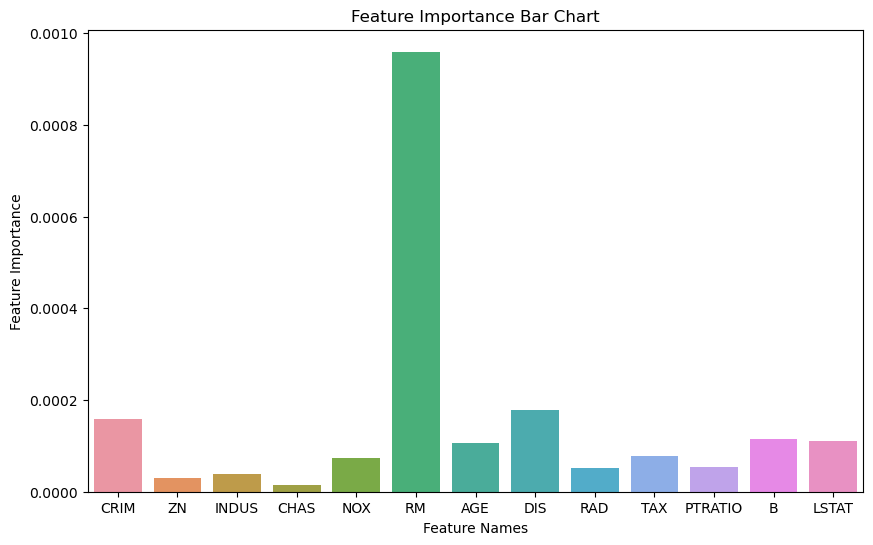

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x='feature_names', y='fet_imp', data=df2[:-1])
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Bar Chart')


Text(0, 0.5, 'Value of houses (k$)')

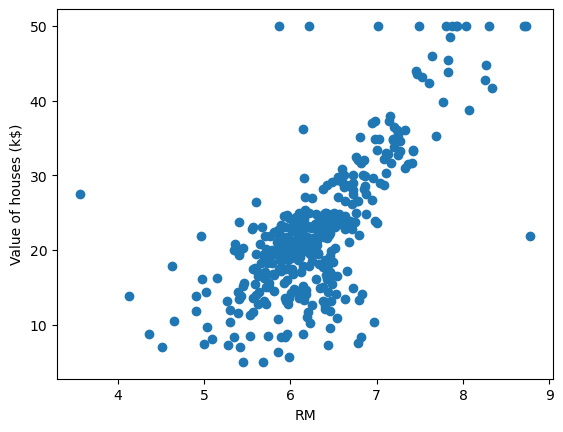

In [158]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X['RM'], y)
ax.set_xlabel('RM')
ax.set_ylabel('Value of houses (k$)')

In [159]:
from sklearn import tree
tree.export_graphviz(reg.estimators_[0],
                     'tree.dot')

In [165]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
# Pull out one tree from the forest
tree = reg.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz

# Pull out one tree from the forest
tree = reg.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df.columns, rounded = True, precision = 1)


You'll need to open tree.dot file in a text editor, e.g., notepad.  Select all the code and paste in here:  http://www.webgraphviz.com/.  Scroll right and the tree should show up.

## More practice - optional but recommended because its interesting and doesn't take too long

This is another good [tutorial](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0) on random forest:
.  You can perform this tutorial on your own and expand it for your choose your adventure, though you should be sure to demonstrate knowledge of this topic vs. copying and executing the tutorial.